## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).

- Calcula la exactitud y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).

- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/

- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



## Desarrollo Parte 1##

**Contexto**

(WELFake) es un dataset de 72.134 artículos con 35.028 noticias verdaderas y 37.106 falsas. Para esto, los autores fusionaron 4 datasets populares de noticias (por ejemplo Kaggle, McIntire, Reuters, BuzzFeed Political) para prevenir sobreajuste de los clasificadores y proveer más datos de texto para un mejor entrenamiento de ML.

**Diccionario**

El dataset contiene 4 columnas:

  - 'Unnamed: 0': Índices empezando desde el 0. (Variable metadatos)

  - 'Title': Título del artículo noticioso. (Variable objeto)

  - 'Text': Contenido del artículo noticioso. (Variable objeto)

  - 'Label': Etiqueta (0 = falso y 1 = verdadero). (Variable objetivo)

Hay 78.098 datos de entrada en archivo "csv" de los cuales solo se accede a 72134 entradas según el dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import re

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Cargar el dataset
df_original = pd.read_csv('/content/drive/MyDrive/Bootcamp/WELFake_Dataset.csv')
df_original

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df_original.shape

(72134, 4)

- El dataset original consta de 72134 resgistros y 4 variables.

In [4]:
df_original.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df_original.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
df_original.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


- Veremos cómo se distribuyen los valores de nuestra variable objetivo 'label'.

In [8]:
# ver los valores de 'label'

print(df_original['label'].value_counts())


label
1    37106
0    35028
Name: count, dtype: int64


- Se encuentran distribuidas en aproximadamente 50-50%.

- Procederemos a evaluar los valores nulos.

In [9]:
# Total de filas con al menos un valor nulo
rows_with_nulls = df_original.isnull().any(axis=1).sum()

# Porcentaje de filas con valores nulos respecto al total de filas
percentage_nulls = (rows_with_nulls / len(df_original)) * 100

print(f"Total de filas con al menos un valor nulo: {rows_with_nulls}")
print(f"Porcentaje de filas con valores nulos: {percentage_nulls:.2f}%")

Total de filas con al menos un valor nulo: 597
Porcentaje de filas con valores nulos: 0.83%


- La cantidad de registros con valores nulos representan menos del 1% porciento de nuestro dataset. Es un porcentaje muy bajo que no incide de gran manera en el objetivo de este proyecto, por lo tanto serán eliminados.



In [10]:
# Eliminar filas con valores nulos
df_original = df_original.dropna()

- Ahora verificamos la completitud y los datos duplicados de 'df_original'.

In [11]:
#verificar la completitud de 'df_original'
completitud = pd.DataFrame(df_original.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total_dfaltantes"})
completitud["completitud"] = (1 - completitud["total_dfaltantes"] / df_original.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total_dfaltantes,completitud
0,Unnamed: 0,0,100.0
1,title,0,100.0
2,text,0,100.0
3,label,0,100.0


In [12]:
#verificar los duplicados de 'df_original'
df_original.duplicated().sum()

0

- El dataset tiene una completitud del 100% y no posee valores duplicados.



**LIMPIEZA**

- Lo siguiente que haremos es reiniciar el índice de nuestro dataset y eliminar la columna 'Unnamed' que no nos aporta valor ya que se trata de solamente otros índices para nuestras filas.

In [13]:
# resetear el index de df_original
df_original.reset_index(drop=True, inplace=True)

# eliminar columna 'Unnamed: 0'

df_original = df_original.drop('Unnamed: 0', axis=1)

df_original

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
71532,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
71533,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
71534,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
71535,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


- En este proyecto vamos a trabajar con datos en idioma inglés, por lo cual tenemos que verificar cuántos registros están en otros idiomas.

In [14]:
# Todas las filas donde 'text' no esta en idioma ingles
def is_english(text):
  """
  Función para verificar si un texto está en inglés.
  """
  if not isinstance(text, str):
    return False  # No es un texto válido
  return bool(re.search(r'[a-zA-Z]', text))

# Encontrar filas donde 'text' no está en inglés
rows_not_english = df_original[~df_original['text'].apply(is_english)]

In [15]:
# cantidad de filas de rows_not_english
print(len(rows_not_english))

788


In [16]:
# Porcentaje de roWs_not_english en df_original

percentage_not_english = (len(rows_not_english) / len(df_original)) * 100
print(f"Porcentaje de filas con texto que no están inglés: {percentage_not_english:.2f}%")


Porcentaje de filas con texto que no están inglés: 1.10%


- Tenemos 788 registros que no están en idioma inglés, correspondientes al 1,10%.

- Al ser un porcentaje tan bajo vamos a optar por eliminarlos, ya que no es una muestra representativa que dañe la eficiencia de nuestro proyecto.

In [17]:
# Borrar las filas 'rows_not_english' en df_original

# Eliminar las filas donde 'text' no está en inglés
df1 = df_original[df_original['text'].apply(is_english)]

# Restablecer el índice después de eliminar filas
df1.reset_index(drop=True, inplace=True)


In [18]:
# Explorar cuántas etiquetas trae label y si están balanceadas
label_counts = df1['label'].value_counts()
print(label_counts)

# Verificar si las etiquetas están balanceadas
print(f"Porcentaje de noticias falsas: {label_counts[0] / len(df1) * 100:.2f}%")
print(f"Porcentaje de noticias verdaderas: {label_counts[1] / len(df1) * 100:.2f}%")


label
1    35722
0    35027
Name: count, dtype: int64
Porcentaje de noticias falsas: 49.51%
Porcentaje de noticias verdaderas: 50.49%


- Comprobamos que nuestra variable 'label' sigue balanceada después de eliminar determinadas filas y columnas.

- A continuación, vamos a proceder con una limpieza más profunda de nuestro dataset, para que los datos queden más óptimos antes de tokenizar y modelar.

In [19]:
# todas las letras minusculas en ´title´y ´text´

df1['title'] = df1['title'].str.lower()
df1['text'] = df1['text'].str.lower()
df1

# borrar url en title y text

def remove_urls(text):
  """Removes URLs from a text string."""
  return re.sub(r'http\S+', '', text)

df1['title'] = df1['title'].apply(remove_urls)
df1['text'] = df1['text'].apply(remove_urls)

# borrar signos de puntuacion

def remove_punctuation(text):
  """Removes punctuation from a text string."""
  return re.sub(r'[^\w\s]', '', text)

df1['title'] = df1['title'].apply(remove_punctuation)
df1['text'] = df1['text'].apply(remove_punctuation)

# borrar numeros en title y text

def remove_numbers(text):
  """Removes numbers from a text string."""
  return re.sub(r'\d+', '', text)

df1['title'] = df1['title'].apply(remove_numbers)
df1['text'] = df1['text'].apply(remove_numbers)

# eliminar '\n' de title y text

df1['title'] = df1['title'].str.replace('\n', '')
df1['text'] = df1['text'].str.replace('\n', '')

# eliminar stopwords de title y text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  """Removes stopwords from a text string."""
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)


df1['title'] = df1['title'].apply(remove_stopwords)
df1['text'] = df1['text'].apply(remove_stopwords)

# que los textos de 'text' no tengan mas de 300 palabras

def truncate_text(text, max_length=300):
  """Trunca un texto a un número máximo de palabras."""
  words = text.split()
  if len(words) > max_length:
    return ' '.join(words[:max_length])
  else:
    return text

df1['text'] = df1['text'].apply(truncate_text)

# lematizar en ingles los textos de 'title' y 'text'

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  """Lemmatizes a text string."""
  words = text.split()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)

df1['title'] = df1['title'].apply(lemmatize_text)
df1['text'] = df1['text'].apply(lemmatize_text)

# borrar la palabra 'u' de 'title' y 'text' en df1

df1['title'] = df1['title'].str.replace(' u ', ' ')
df1['text'] = df1['text'].str.replace(' u ', ' ')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
# ver 30 filas de df1

from IPython.display import HTML

# Convertir el DataFrame a HTML sin truncamiento
html_table = df1.head(50).to_html(index=False, escape=False)

# Mostrar la tabla HTML
HTML(html_table)


title,text,label
law enforcement high alert following threat cop white blacklivesmatter fyf terrorist video,comment expected barack obama member fyf fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf lolatwhitefear twitter page pm show urging supporter call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyfthe radio show aired pm eastern standard timeduring show caller clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf conference callsan unidentified black man said mother fkers start fing like bunch niers takin one roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspired cop started losing people state emergency speculated one two thing would happen bigass r war niers going start backin already getting killed fk got lose sunshine could heard saying yep true fking true said need turn table kid getting shot somebody need become sacrifice sidehe said everybody st whatever like say everybody different position war continued give fk anyway said might well utilized st turn table ners said way start lookin like havin many casualty causality side instead killing black people black life matter mother fkers got make matter find mother fker alone snap as fin hang damn tree take picture send mother fkers need one example people start watchin turn table st said said start trickledown effect said one white person hung flathanging start trickledown effect continued black people good starting trend said get upperhand another black man spoke saying needed kill cop killing first black male said best method right breitbart texas previously reported,1
unbelievable obamas attorney general say charlotte rioter peaceful protestersin home state north carolina video,demonstrator gathered last night exercising constitutional protected right peaceful protest order raise issue create change loretta lynch aka eric holder skirt,1
bobby jindal raised hindu us story christian conversion woo evangelicals potential bid,dozen politically active pastor came private dinner friday night hear conversion story unique context presidential politics louisiana gov bobby jindal traveled hinduism protestant christianity ultimately became call evangelical catholicover two hour jindal recalled talking girl high school wanted save soul reading bible closet parent would see feeling stir watching movie senior year depicted jesus crossi struck struck hard jindal told pastor son god died sinsjindals session christian clergy lead congregation early presidential battleground state iowa south carolina part behindthescenes effort louisiana governor find political base could help propel top tier republican candidate seeking run white house known gop circle mostly mastery policy issue health care jindal rhodes scholar graduate ivy league brown university obvious pool activist supporter help drive excitement outside home state harnessing religious experience way begun appeal part gop influential core religious conservative many yet find favorite among republican eyeing presidential raceother potential gop candidate wooing evangelical base including sen rand paul ky ted cruz tex indiana gov mike pencebut weekend lynchburg mecca sort evangelicals home liberty university founded rev jerry falwell jindal appeared make progressin addition dinner pastor delivered wellreceived call action address christian conservative gathered liberty commencement ceremony talking faith assailing said president obamas record attacking religious libertythe pastor came meet jindal said intimate description experience sto

- Vamos a buscar las palabras más comunes de nuestro dataset modificado 'df1' y su correspondiente frecuencia.

In [21]:
# las 1000 palabras mas comunes y su frecuencia de df1

from collections import Counter

# Combinar todas las palabras de la columna 'text'
all_words = ' '.join(df1['text']).split()

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words)

# Obtener las 1000 palabras más comunes
most_common_words = word_counts.most_common(1000)

# Mostrar las palabras y su frecuencia
for word, count in most_common_words:
  print(f"{word}: {count}")


trump: 159039
said: 157101
state: 76806
would: 69385
president: 67990
people: 59295
one: 56352
year: 50834
clinton: 49857
new: 47702
republican: 45404
also: 42972
time: 42605
donald: 36567
mr: 35496
like: 35368
government: 35226
american: 34923
house: 33751
say: 33708
country: 33252
election: 33184
could: 31980
campaign: 31288
obama: 30824
united: 29853
two: 29402
news: 29128
party: 28816
hillary: 28812
last: 28798
white: 28451
first: 28391
told: 28038
reuters: 27968
day: 27410
right: 27292
even: 27055
official: 26034
many: 25939
make: 25243
get: 24625
group: 23806
week: 23415
law: 23010
woman: 21931
may: 21873
former: 21774
vote: 21596
washington: 21389
medium: 21176
want: 21142
know: 21085
national: 21049
political: 20853
made: 20842
way: 20817
going: 20716
police: 20433
world: 20290
million: 20253
since: 19972
take: 19759
percent: 19641
think: 19626
presidential: 19543
court: 19160
back: 19155
security: 18892
democrat: 18503
according: 18333
month: 18245
leader: 18194
support: 17933

**SPLIT DE DATOS Y TOKENIZACION**

- Luego de la limpieza, vamos a separar nuestros datos en conjuntos de entrenamiento y prueba.

- Antes hay que verfificar cuál es el registro de 'text' con más elementos

In [22]:
# Encontrar la fila con el texto más largo
max_length_text = df1['text'].str.len().max()
row_with_max_length_text = df1[df1['text'].str.len() == max_length_text]

# Contar las palabras en ese texto más largo
text_with_most_words = row_with_max_length_text['text'].iloc[0]
num_words_in_longest_text = len(text_with_most_words.split())
print(f"El texto con más palabras tiene {num_words_in_longest_text} palabras.")

El texto con más palabras tiene 115 palabras.


In [23]:
# split de datos

# Combinar 'title' y 'text' en una sola columna
df1['combined_text'] = df1['title'] + ' ' + df1['text']

# Definir X e y
X = df1['combined_text']
y = df1['label']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprimir las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (56599,)
Forma de y_train: (56599,)
Forma de X_test: (14150,)
Forma de y_test: (14150,)


- Con los conjuntos de datos ya definidos, procederemos a tokenizar los datos, tomando en cuenta las 1000 palabras mas comunes de nuestro dataset 'df1'

- Vamos a trabajar con las 1000 palabras más comunes.

In [24]:
# tokenizar con keras

# Definir el tamaño del vocabulario
vocab_size = 1000

# Crear un tokenizador
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Ajustar el tokenizador a los datos de entrenamiento
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias de números
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Definir la longitud máxima de las secuencias
max_length = 115

# Rellenar las secuencias para que tengan la misma longitud
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

**MODELADO**

- Escogemos LSTM para modelar nuestro proyecto, porque es una excelente elección para la detección de noticias falsas ya que son capaces de capturar el contexto a largo plazo, manejar secuencias largas, y recordar patrones en las secuencias de texto, características que son esenciales para analizar y predecir si un artículo noticioso es verdadero o falso.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 169s 366ms/step - accuracy: 0.6173 - loss: 0.6028 - val_accuracy: 0.9138 - val_loss: 0.2416
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 203s 369ms/step - accuracy: 0.9303 - loss: 0.2013 - val_accuracy: 0.9377 - val_loss: 0.1683
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 158s 357ms/step - accuracy: 0.9435 - loss: 0.1614 - val_accuracy: 0.9377 - val_loss: 0.1727
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 202s 357ms/step - accuracy: 0.9455 - loss: 0.1568 - val_accuracy: 0.9413 - val_loss: 0.1665
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 215s 387ms/step - accuracy: 0.9494 - loss: 0.1449 - val_accuracy: 0.9381 - val_loss: 0.1751
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 160s 362ms/step - accuracy: 0.9491 - loss: 0.1481 - val_accuracy: 0.9407 - val_loss: 0.1573
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 168s 380ms/step - accuracy: 0.9492 - loss: 0.1460 - val_accuracy: 0.9368 - val_loss: 0.1653
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 193s 361ms/step - accuracy: 0.9475 -

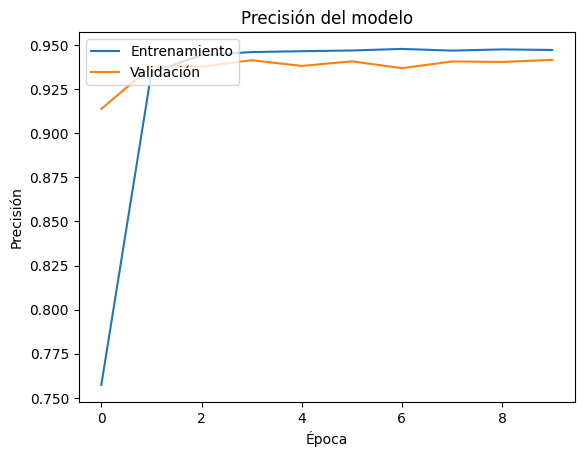

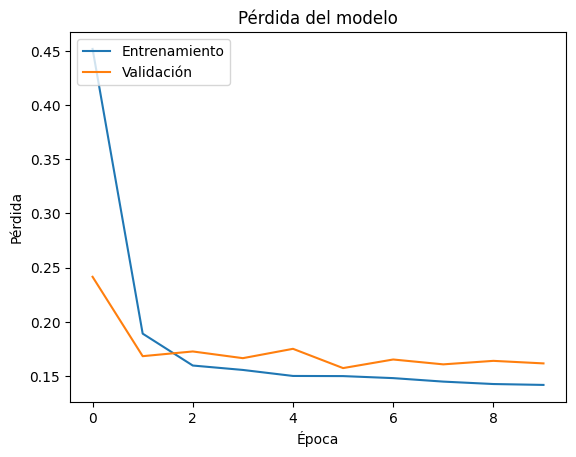

In [25]:
# modelo lstm

embedding_dim = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, return_sequences=True)) #####
model.add(Dropout(0.2))
model.add(LSTM(32)) ######
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

# entrenar modelo

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_test_pad, y_test))
                                            #####
# graficar curvas de aprendizaje

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


- Luego de nuestro primer modelo inicial, a través de nuestras curvas de aprendizaje, nos podemos dar cuenta que 4 sería una buena cantidad de epocas, porque nuestro aprendizaje lleva a su máximo y luego se estabiliza.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
443/443 ━━━━━━━━━━━━━━━━━━━━ 163s 359ms/step - accuracy: 0.6204 - loss: 0.5998 - val_accuracy: 0.9121 - val_loss: 0.2514
Epoch 2/4
443/443 ━━━━━━━━━━━━━━━━━━━━ 204s 363ms/step - accuracy: 0.9284 - loss: 0.2136 - val_accuracy: 0.9328 - val_loss: 0.1863
Epoch 3/4
443/443 ━━━━━━━━━━━━━━━━━━━━ 212s 387ms/step - accuracy: 0.9434 - loss: 0.1634 - val_accuracy: 0.9368 - val_loss: 0.1759
Epoch 4/4
443/443 ━━━━━━━━━━━━━━━━━━━━ 191s 362ms/step - accuracy: 0.9444 - loss: 0.1576 - val_accuracy: 0.9414 - val_loss: 0.1627


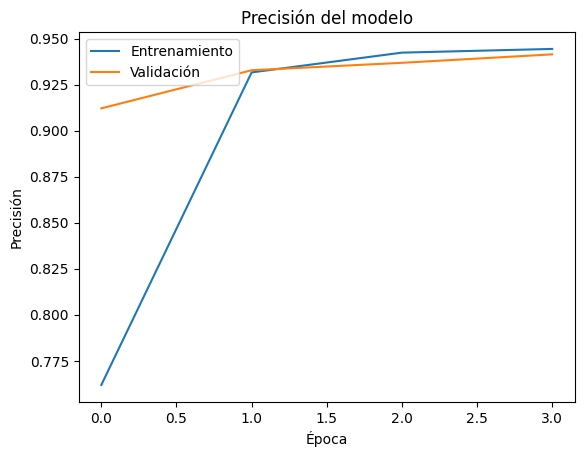

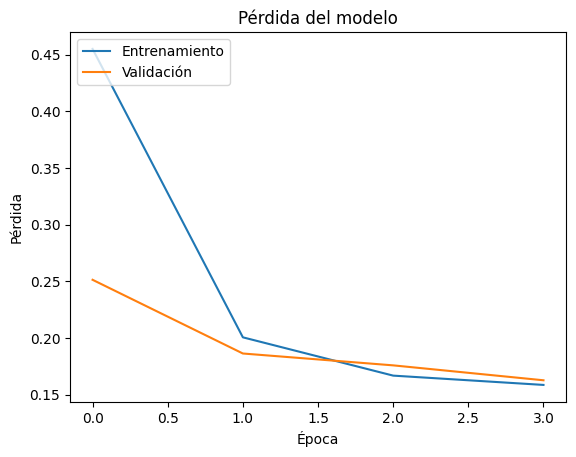

In [26]:
# modelo lstm final

embedding_dim = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64, return_sequences=True)) #####
model.add(Dropout(0.2))
model.add(LSTM(32)) ######
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

# entrenar modelo

history = model.fit(X_train_pad, y_train, epochs=4, batch_size=128, validation_data=(X_test_pad, y_test))
                                            #####
# graficar curvas de aprendizaje

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [28]:
# Definir una función para predecir si una noticia es falsa o verdadera
def predict_news(text, model, tokenizer, max_length):
  """
  Predice si una noticia es falsa o verdadera.
  """

  # Preprocesar el texto de la misma manera que los datos de entrenamiento
  text = text.lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = text.replace('\n', '')

  nltk.download('stopwords')
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  text = ' '.join(filtered_words)

  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  text = ' '.join(lemmatized_words)

  text = text.replace(' u ', ' ')

  # Convertir el texto a una secuencia de números
  sequence = tokenizer.texts_to_sequences([text])

  # Rellenar la secuencia para que tenga la misma longitud que los datos de entrenamiento
  padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

  # Realizar la predicción con el modelo
  prediction = model.predict(padded_sequence)[0][0]

  # Interpretar la predicción
  if prediction >= 0.5:
    return "Verdadera", prediction
  else:
    return "Falsa", prediction


# Ejemplo de uso con un texto nuevo
new_text="Exposed FBI Director James Comey Clinton Foundation Connection WASHINGTON DC A review of FBI Director James Comey professional history and relationships shows that the Obama cabinet leader now under fire for his handling of the investigation of Hillary Clinton is deeply entrenched in the big money cronyism culture of Washington dc His personal and professional relationships all undisclosed as he announced the Bureau would not prosecute Clinton reinforce bipartisan concerns that he may have politicized the criminal probe These concerns focus on millions of dollars that Comey accepted from a Clinton Foundation defense contractor, Comey former membership on a Clinton Foundation corporate partner board, and his surprising financial relationship with his brother Peter Comey, who works at the law firm that does the Clinton Foundation s taxes. Lockheed Martin When President Obama nominated Comey to become FBI director in 2013, Comey promised the United States Senate that he would recuse himself on all cases involving former employers But Comey earned 6 million in one year alone from Lockheed Martin. Lockheed Martin became a Clinton Foundation donor that very year. Comey served as deputy attorney general under John Ashcroft for two years of the Bush administration. When he left the Bush administration, he went directly to Lockheed Martin and became vice president, acting as a general counsel. How much money did James Comey make from Lockheed Martin in his last year with the company, which he left in 2010? More than 6 million in compensation. Lockheed Martin is a Clinton Foundation donor. The company admitted to becoming a Clinton Global Initiative member in 2010. According to records, Lockheed Martin is also a member of the American Chamber of Commerce in Egypt, which paid Bill Clinton 250,000 to deliver a speech in 2010. In 2010, Lockheed Martin won 17 approvals for private contracts from the Hillary Clinton State Department. HSBC Holdings In 2013, Comey became a board member, a director, and a Financial System Vulnerabilities Committee member of the London bank HSBC Holdings. Mr. Comey s appointment will be for an initial three-year term which, subject to re-election by shareholders, will expire at the conclusion of the 2016 Annual General Meeting according to HSBC company records. HSBC Holdings and its various philanthropic branches routinely partner with the Clinton Foundation. For instance, HSBC Holdings has partnered with Deutsche Bank through the Clinton Foundation to retrofit 1,500 to 2,500 housing units, primarily in the low- to moderate-income sector in New York City Retrofitting refers to a Green initiative to conserve energy in commercial housing units. Clinton Foundation records show that the Foundation projected 1 billion in financing for this Green initiative to conserve people s energy in low-income housing units Who Is Peter Comey? When our source called the Chinatown offices of D.C. law firm DLA Piper and asked for Peter Comey, a receptionist immediately put him through to Comey s direct line. But Peter Comey is not featured on the DLA Piper website. Peter Comey serves as Senior Director of Real Estate Operations for the Americas for DLA Piper. James Comey was not questioned about his relationship with Peter Comey in his confirmation hearing. DLA Piper is the firm that performed the independent audit of the Clinton Foundation in November during Clinton-Worlds first big push to put the email scandal behind them. DLA Pipers employees taken as a whole represent a major Hillary Clinton 2016 campaign donation bloc and Clinton Foundation donation base. DLA Piper ranks #5 on Hillary Clinton s all-time career Top Contributors list, just ahead of Goldman Sachs And here is another thing: Peter Comey has a mortgage on his house that is owned by his brother James Comey, the FBI director. Peter Comey s financial records, obtained by Breitbart News, show that he bought a 950,000 house in Vienna, Virginia, in June 2008. He needed a 712,500 mortgage from First Savings Mortgage Corporation. But on January 31, 2011, James Comey and his wife stepped in to become Private Party lenders. They granted a mortgage on the house for 711,000. Financial records suggest that Peter Comey took out two such mortgages from his brother that day. This financial relationship between the Comey brothers began prior to James Comey s nomination to become director of the FBI. DLA Piper did not answer Breitbart News question as to whether James Comey and Peter Comey spoke at any point about this mortgage or anything else during the Clinton email investigation. Peter Comey Re-Designed the FBI Building FBI Director James Comey grew up in the New Jersey suburbs with his brother Peter. Both Comeys were briefly taken captive in 1977 by the Ramsey rapist but the boys managed to escape through a window in their home, and neither boy was harmed James Comey became a prosecutor who worked on the Gambino crime family case. He went on to the Bush administration, a handful of private sector jobs, and then the Obama administration in 2013.Peter Comey, meanwhile, went into construction.After getting an MBA in real estate and urban development from George Washington University in 1998, Peter Comey became an executive at a company that re-designed George Washington University between 2004 and 2007 while his brother was in town working for the Bush administration.In January 2009, at the beginning of the Obama administration, Peter Comey became a real estate and construction consultant for Procon Consulting. Procon Consulting s client list includes FBI Headquarters Washington, DC. So what did Procon Consulting do for FBI Headquarters? Quite a bit, apparently. According to the firm s records: Procon provided strategic project management for the consolidation of over 11,000 FBI personnel into one, high security, facility. Since 1972 the Federal Bureau of Investigation has had its headquarters in a purpose built 2.1 million square foot building on Pennsylvania Avenue. Having become functionally obsolete and in need of major repairs, GSA and the FBI were considering ways to meet the space needs required to maintain the Bureau s mission and consolidate over 11,000 personnel. Procon assisted GSA in assessing the FBI s space needs and options for fulfilling those needs. Services provided included project management related to site evaluations, budgeting, due diligence, and the development of procurement and funding strategies. Those funding strategies included talking to stakeholders Worked with stakeholders and key leadership to identify strategic objectives, goals and long range plans for capital and real estate projects Procon Consulting obtained its contract for FBI Headquarters prior to James Comey s nomination to serve as director of the FBI In June 2011, Peter Comey left Procon Consulting to become Senior Director of Real Estate Operations for the Americas for DLA Piper Peter Comey has generated some controversy in that role. According to Law360 in May 2013 the same month that James Comey was confirmed as someone being considered by Obama to become FBI director: Two real estate services businesses filed a $10 million suit against the law firm Monday alleging it stiffed them on as much as 760,000 of work done at DLA Piper s Chicago office and improperly gave proprietary information to a competitor. The plaintiffs take particular aim at Peter Comey, DLA Pipers senior director of real estate operations. Leasecorp and SpaceLogik include several emails in the complaint that are purportedly from DLA Piper senior real estate partners Jay Epstein and Rich Klawiter and are sharply critical of Comeys handling of the matter. In one email, Epstein wrote that “its an embarrassment for the firm to be treating someone who we are working with like this In another email allegedly from Klawiter on Feb. 20, the DLA Piper partner informed Leasecorp President Michael Walker, a principal for both plaintiffs, that Comey had sent him and Epstein an email claiming that the real estate services firms were behind on their contractual obligations. I just received an email from Peter Jay was also a recipient that is so inflammatory I cant even send it or youll hit the roof, Klawiter said in the email, according to the complaint. This is not going to end well."
prediction_label, prediction_score = predict_news(new_text, model, tokenizer, max_length)

print(f"La noticia es: {prediction_label}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
La noticia es: Verdadera


In [29]:
# Definir una función para predecir si una noticia es falsa o verdadera
def predict_news(text, model, tokenizer, max_length):
  """
  Predice si una noticia es falsa o verdadera.
  """

  # Preprocesar el texto de la misma manera que los datos de entrenamiento
  text = text.lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = text.replace('\n', '')

  nltk.download('stopwords')
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  text = ' '.join(filtered_words)

  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  text = ' '.join(lemmatized_words)

  text = text.replace(' u ', ' ')

  # Convertir el texto a una secuencia de números
  sequence = tokenizer.texts_to_sequences([text])

  # Rellenar la secuencia para que tenga la misma longitud que los datos de entrenamiento
  padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

  # Realizar la predicción con el modelo
  prediction = model.predict(padded_sequence)[0][0]

  # Interpretar la predicción
  if prediction >= 0.5:
    return "Verdadera", prediction
  else:
    return "Falsa", prediction


# Ejemplo de uso con un texto nuevo
new_text= "How Kathryn Nesbitt became one of the World Cup’s first female refs NOVEMBER 21, 2022 Kathryn Nesbitt had spent a decade balancing parallel careers in analytical chemistry and soccer officiating when, in 2019, she put her scientific brain to work and synthesized a solution for the most pragmatic path forward. Two weeks before Nesbitt left for France to serve as an assistant referee at the Women’s World Cup, she stepped down from her assistant professor position at Towson University to focus on officiating full time. What data points informed that decision? She reached the pinnacle of women’s soccer refereeing that summer and had broken into top-flight men’s soccer as well, with dozens of MLS games under her belt. Knowing the 2026 men’s World Cup would be held in the United States, Canada and Mexico, Nesbitt mapped out a plan that would culminate in her being on the sideline of the sport’s premier spectacle. “I had no idea if they’d ever let women officiate at that World Cup, but I wanted to see if I could do that,” said Nesbitt, 34. “I realized at the time that in order to even attempt that, I would need to dedicate all of my time and effort into one job.” Once Nesbitt shifted her focus to officiating, her ascent accelerated. In 2020, she claimed MLS assistant referee of the year honors and became the first woman to officiate an MLS Cup final. A few months later, Concacaf — the confederation that oversees soccer in North America, Central America and the Caribbean — tasked her with men’s World Cup qualifying assignments. By the time FIFA, soccer’s global governing body, announced its pool of referees for the 2022 World Cup in Qatar, the Philadelphia-based official thought she might have a shot. On May 19, Nesbitt woke up, scrolled through Twitter and saw FIFA’s unveiling. The tournament, FIFA stated in its announcement, would feature the first female referees in the 92-year history of the men’s World Cup, with six women among the 129 officials."
prediction_label, prediction_score = predict_news(new_text, model, tokenizer, max_length)

print(f"La noticia es: {prediction_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
La noticia es: Verdadera


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Podemos ver que en la primera predicción el resultado no es el indicado. Unas posibles soluciones serían arreglar hiperparámetros en el modelo, realizar una mejor limpieza del dataset o aumentar el número de palabras para trabajar. Así mejorarían las curvas de aprendizaje y el modelo funcionaría de buena manera.

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

##Desarrollo Parte 2##

In [30]:
#Importar bibliotecas necesarias

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models

In [31]:
#Cargar dataset

from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Vamos a ver la forma que tienen esos conjuntos usando el método .shape

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- Veamos lo que contiene el conjunto 'y'



In [33]:
print(y_train[0])
print(y_train[10])
print(y_train[50])

5
3
3


- Las etiquetas del conjunto «y»

In [34]:
# Verificar el rango de las etiquetas en y_train
unique_labels = set(y_train)
print("Etiquetas únicas en y_train:", unique_labels)

# Verificar el rango de las etiquetas en y_test
unique_labels_test = set(y_test)
print("Etiquetas únicas en y_test:", unique_labels_test)



Etiquetas únicas en y_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Etiquetas únicas en y_test: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


- ver las imágenes que representan cada etiqueta

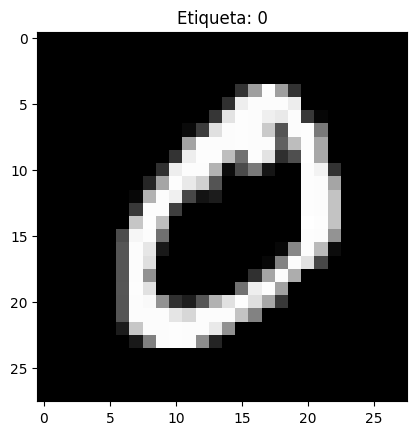

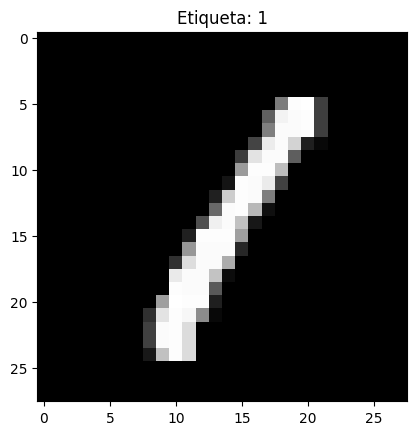

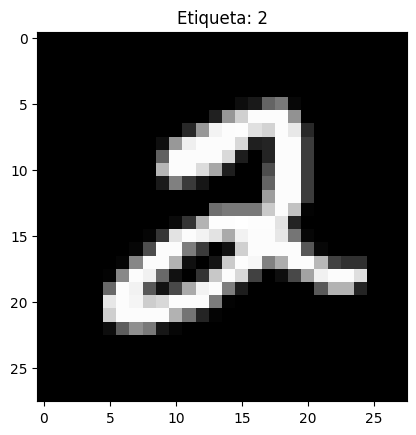

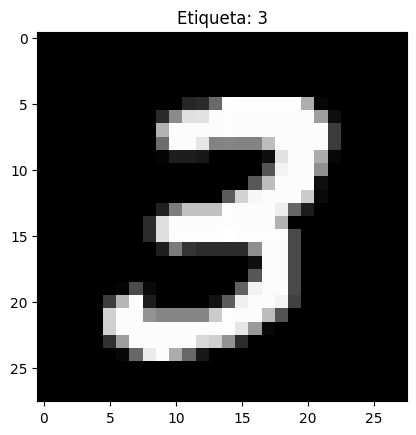

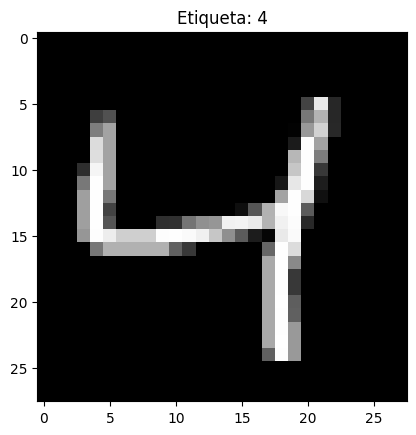

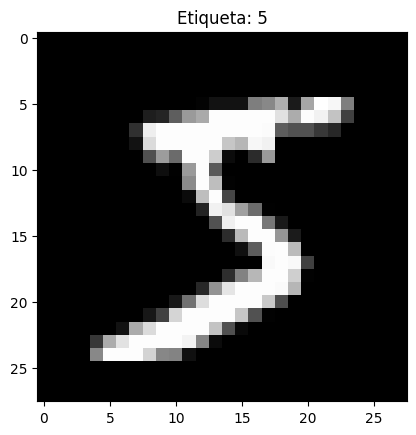

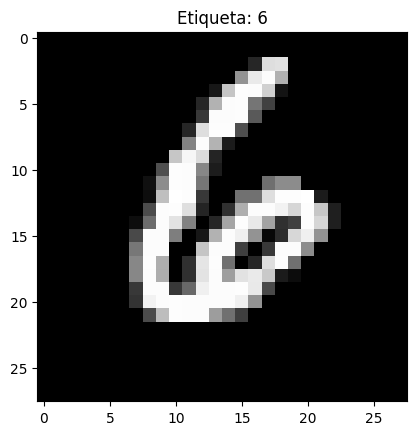

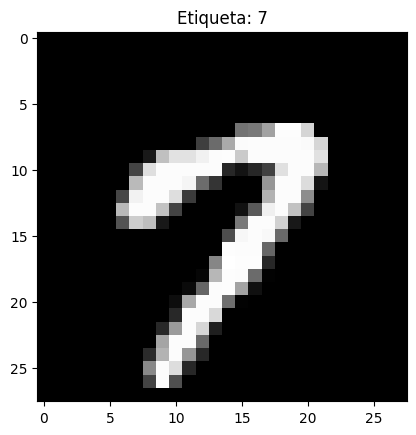

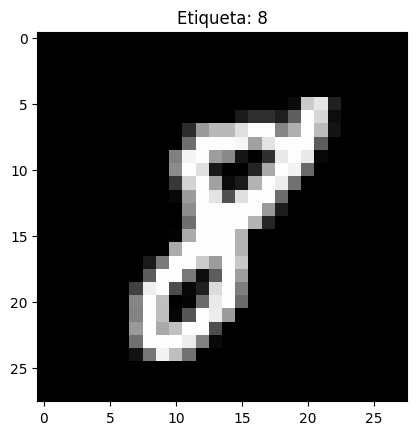

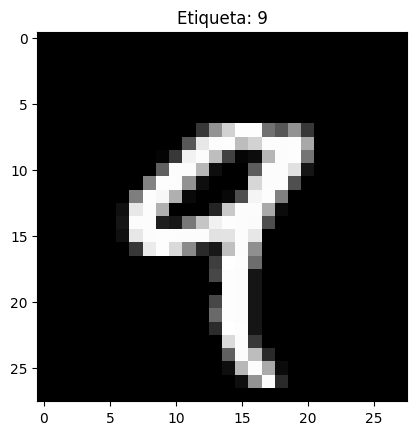

In [35]:
# Mostrar algunas imágenes de cada etiqueta
for label in range(10):
  # Encuentra el índice de la primera imagen con la etiqueta actual
  index = np.where(y_train == label)[0][0]

  # Mostrar la imagen
  plt.imshow(X_train[index], cmap='gray')
  plt.title(f"Etiqueta: {label}")
  plt.show()


- Las etiquetas del conjunto «y» son números que van del `0` al `9`, lo que quiere decir que cada valor corresponde a lo siguiente:
0. número 0
1. número 1
2. número 2
3. número 3
4. número 4
5. número 5
6. número 6
7. número 7
8. número 8
9. número 9

- Agregamos una dimensión con valor 1 a x_train y y_train para especificar el número de canales en las imágenes. En este caso, estamos trabajando con imágenes en escala de grises, por lo que solo tenemos un canal.

In [36]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

- Las redes neuronales funcionan mejor si trabajan con valores flotantes, esto es en general, por lo que se recomienda siempre modificar los valores con la función .astype('float32'),que convertirá a los enteros (integers, en inglés).

In [37]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

- Para que la red neuronal funcione de manera adecuada, necesita diez salidas, que son las diez posibles respuestas. Para ello, necesitarás un 'one hot encoder' de TensorFlow.

- Antes debemos estar seguros de que los valores de esas etiquetas sean enteros, solo para asegurar usaremos .astype(np.int32).

- Notarás que hay un parámetro llamado depth. En este se indican cuántos posibiles resultados existen; en nuestro ejemplo son 10.

In [38]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

- Ahora vamos a visualizar las primeras 10 imágenes del conjunto de entrenamiento con sus etiquetas.

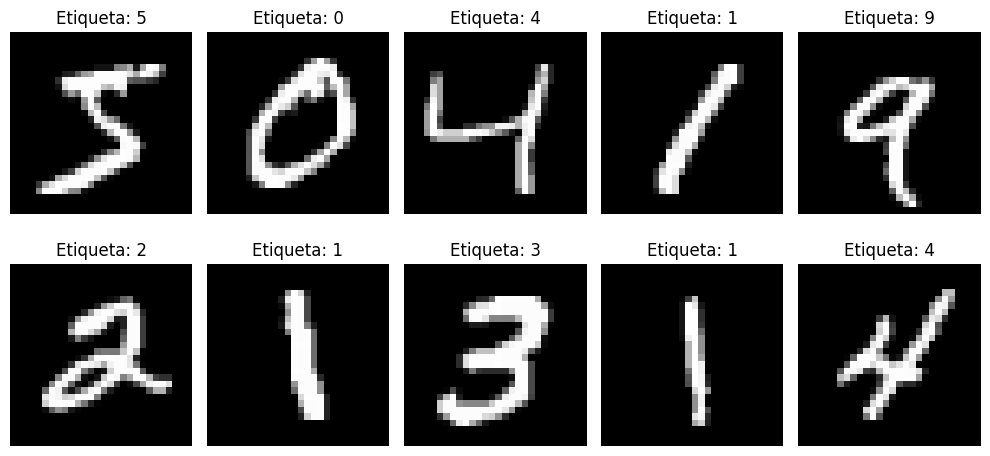

In [39]:
# Visualizar las primeras 10 imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


- A continuacón vamos a pasar al modelado.

- Vamos a partir con un modelo simple, con 1 capa de entrada, 1 capa oculta y 1 capa de salida.

Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8603 - loss: 0.5016 - val_accuracy: 0.9507 - val_loss: 0.1630
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9598 - loss: 0.1404 - val_accuracy: 0.9651 - val_loss: 0.1164
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9717 - loss: 0.0958 - val_accuracy: 0.9699 - val_loss: 0.0990
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0695 - val_accuracy: 0.9730 - val_loss: 0.0864
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9842 - loss: 0.0555 - val_accuracy: 0.9753 - val_loss: 0.0823
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0424 - val_accuracy: 0.9773 - val_loss: 0.0771
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9898 - loss: 0.0360 - val_accuracy: 0.9782 - val_loss: 0.0752
Epoch 8/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9922 - loss: 0.0282 - val_accuracy: 0.

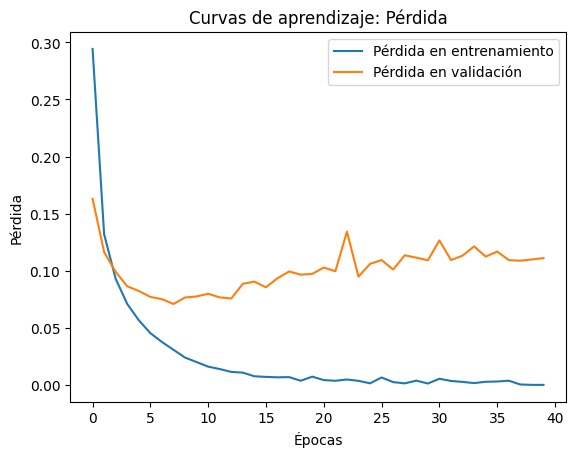

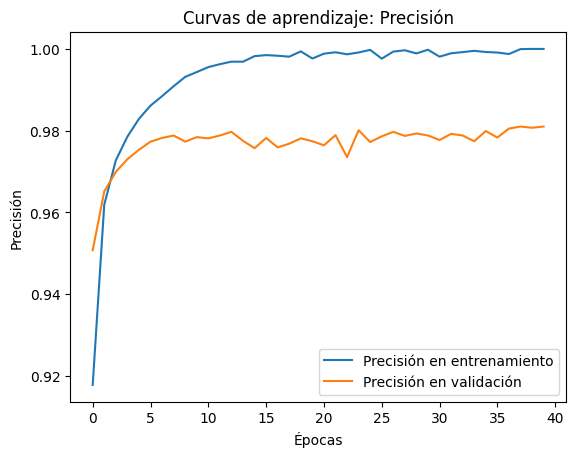

In [40]:
# Modelo simple

# Definir el modelo con 1 capa de entrada, 1 capa oculta y 1 capa de salida
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))  #aplana la imagen
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test))

# Graficar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de aprendizaje: Pérdida')
plt.legend()
plt.show()

# Graficar la precisión (accuracy)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de aprendizaje: Precisión')
plt.legend()
plt.show()

- Nuestras curvas de aprendizaje nos señalan que no está funcionando de manera correcta el modelo simple.

- Aplicaremos cambios a algunos parámetros, sin aumentar la cantidad de capas.

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5792 - loss: 1.4179 - val_accuracy: 0.8896 - val_loss: 0.4414
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8932 - loss: 0.4175 - val_accuracy: 0.9129 - val_loss: 0.3281
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9101 - loss: 0.3343 - val_accuracy: 0.9206 - val_loss: 0.2852
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9205 - loss: 0.2871 - val_accuracy: 0.9256 - val_loss: 0.2610
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9265 - loss: 0.2656 - val_accuracy: 0.9319 - val_loss: 0.2442
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9320 - loss: 0.2467 - val_accuracy: 0.9362 - val_loss: 0.2302
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9362 - loss: 0.2299 - val_accuracy: 0.9378 - val_loss: 0.2187
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9401 - loss: 0.2207 - val_accuracy: 0.

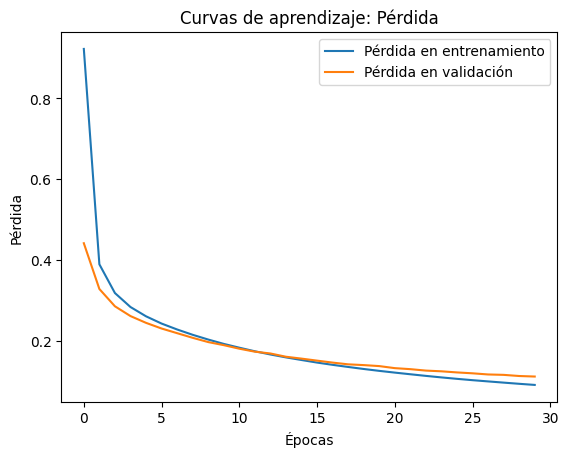

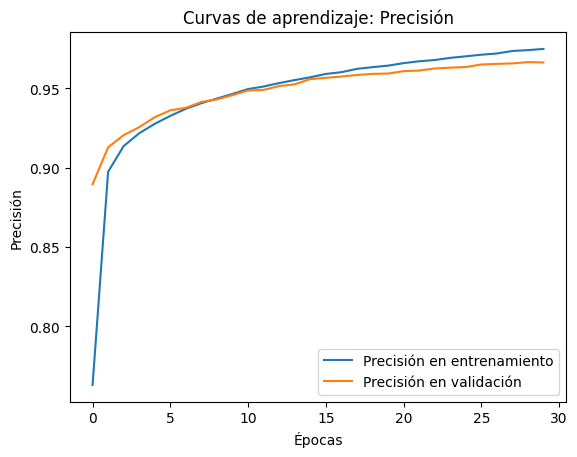

In [41]:
# Modelo Final

# Definir el modelo
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(64, activation='relu'))  ########
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), ######
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test)) ####



# Graficar la pérdida (loss)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de aprendizaje: Pérdida')
plt.legend()
plt.show()

# Graficar la precisión (accuracy)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de aprendizaje: Precisión')
plt.legend()
plt.show()

- Nos damos cuenta que ahora sí el modelo está funcionando bien con las modificaciones que probamos.

- Trabajaremos con este "modelo final", ya que por simplicidad es eficiente sin agregar mucho ruido ni usar mucha más memoria de procesamiento.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


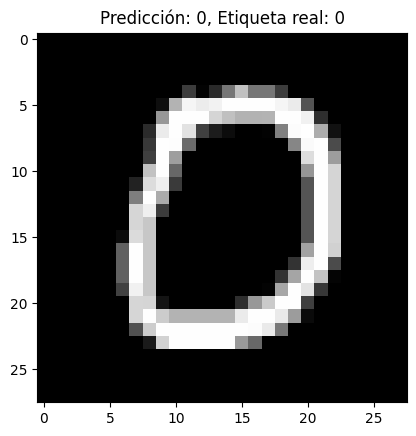

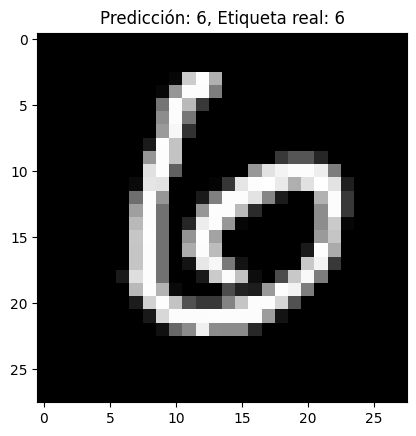

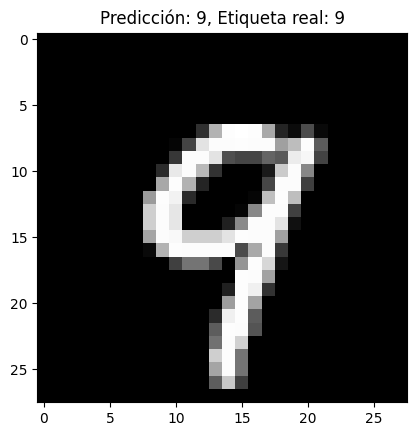

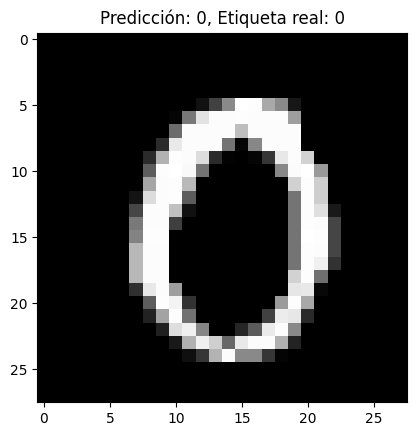

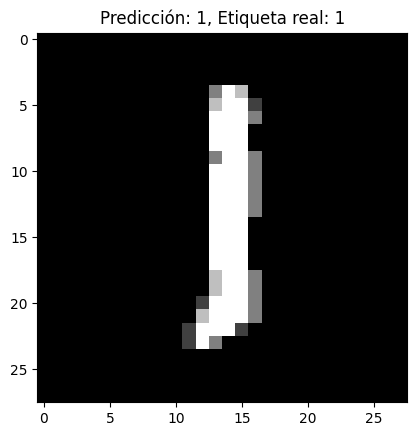

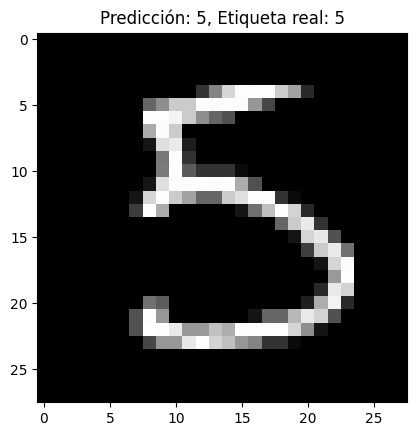

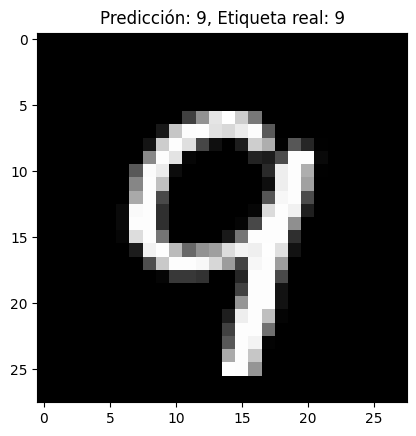

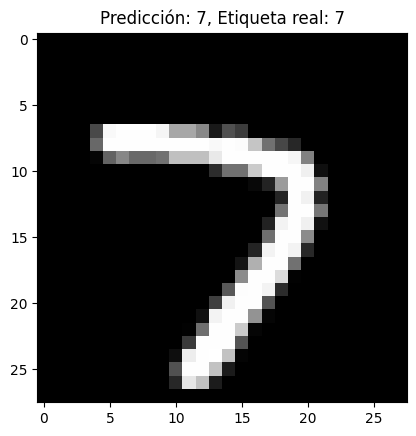

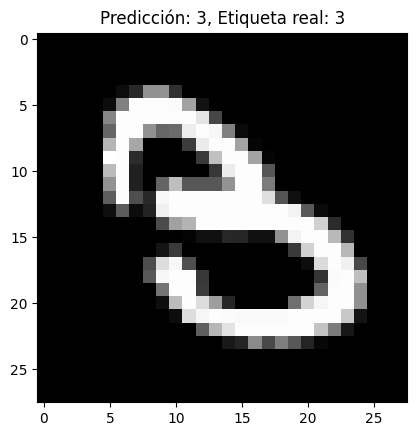

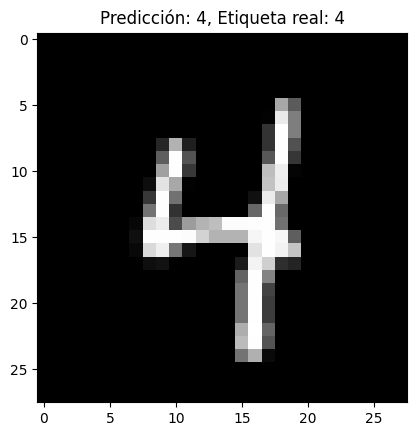

In [43]:
# conjunto de 10 predicciones con los mismos datos del dataset

import matplotlib.pyplot as plt
import numpy as np
# Generar predicciones para 10 imágenes del conjunto de prueba
predictions = model.predict(X_test[10:20])

# Mostrar las predicciones junto con las etiquetas reales
for i in range(10):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i + 10])

  plt.imshow(X_test[i + 10].reshape(28, 28), cmap='gray')
  plt.title(f"Predicción: {predicted_label}, Etiqueta real: {true_label}")
  plt.show()
